<a href="https://colab.research.google.com/github/Shailvi-Thapliyal/skills-introduction-to-gith1ub/blob/main/W05_P02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DOMAIN: Mobile

BUSINESS CONTEXT:
1. A key challenge for Mobile App businesses is to analyze the trend in the market to increase their
sales/usage.
2.We have access to the user's demographic characteristics, geo-location, and mobile device properties. Thisgrouping can be done by applying different criteria like user’s data, their age group, phone brand
compatibility and so on.
3. The machine learning clustering algorithms can provide an analytical method to cluster user segments withsimilar interests/habits.This will help App/mobile providers better understand and interact with their
subscribers.

PROJECT OBJECTIVE:
 We will be clustering the users into groups by selected features that significantly distinguish different brandsfromeach other and understand which factors are responsible for making the clusters

In [ ]:
##Loading the required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from sklearn.decomposition import PCA
from scipy.stats import zscore

from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

In [ ]:
##Read the data
df1 = pd.read_csv("Copy of events.csv")
df1.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [ ]:
df2 = pd.read_csv("Copy of gender_age.csv")
df2.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [ ]:
df3 = pd.read_csv("Copy of phone_device.csv")
df3.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [ ]:
#merging all data frames into single dataframe
df = pd.merge(df1,df2)
df = pd.merge(df,df3)

Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [ ]:
df.head(20)

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,M,46,M39+,小米,红米note
1,7104,29182687948017175,2016-05-02 09:37:02,121.38,31.24,M,46,M39+,小米,红米note
2,29661,29182687948017175,2016-05-04 00:56:04,121.39,31.23,M,46,M39+,小米,红米note
3,33133,29182687948017175,2016-05-06 05:01:15,121.38,31.24,M,46,M39+,小米,红米note
4,38980,29182687948017175,2016-05-06 09:55:04,121.16,31.00,M,46,M39+,小米,红米note
5,66398,29182687948017175,2016-05-01 01:56:06,121.38,31.24,M,46,M39+,小米,红米note
6,70894,29182687948017175,2016-05-06 01:14:46,121.38,31.24,M,46,M39+,小米,红米note
7,87185,29182687948017175,2016-05-01 09:20:01,121.38,31.24,M,46,M39+,小米,红米note
8,94644,29182687948017175,2016-05-07 07:16:35,121.38,31.24,M,46,M39+,小米,红米note
9,110018,29182687948017175,2016-05-06 21:00:40,121.38,31.24,M,46,M39+,小米,红米note


In [ ]:
df.shape

(1220474, 10)

We have more than enough data points

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220474 entries, 0 to 1220473
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   event_id      1220474 non-null  int64  
 1   device_id     1220474 non-null  int64  
 2   timestamp     1220474 non-null  object 
 3   longitude     1220474 non-null  float64
 4   latitude      1220474 non-null  float64
 5   gender        1220474 non-null  object 
 6   age           1220474 non-null  int64  
 7   group         1220474 non-null  object 
 8   phone_brand   1220474 non-null  object 
 9   device_model  1220474 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ MB


No null values.
Data type of all the feature are appropriate.

Check if there are any duplicate records in the dataset? If any drop them.

In [ ]:
df[df.duplicated()]

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model
60138,723,-5600411672557712002,2016-05-05 00:12:20,97.05,40.28,M,22,M22-,vivo,X5Max+
60140,1270,-5600411672557712002,2016-05-03 01:00:49,97.05,40.28,M,22,M22-,vivo,X5Max+
60142,41267,-5600411672557712002,2016-05-01 11:18:39,97.05,40.28,M,22,M22-,vivo,X5Max+
60144,43217,-5600411672557712002,2016-05-02 12:50:33,97.05,40.28,M,22,M22-,vivo,X5Max+
60146,64003,-5600411672557712002,2016-05-07 00:39:05,97.04,40.28,M,22,M22-,vivo,X5Max+
...,...,...,...,...,...,...,...,...,...,...
1215971,2719521,-4694231482794047022,2016-05-04 09:13:10,0.00,0.00,M,26,M23-26,三星,Galaxy S4
1216763,1472325,-3316415803190016190,2016-05-02 09:29:20,0.00,0.00,M,21,M22-,三星,Galaxy Note 3
1219650,2428027,4301856296238192314,2016-05-01 13:53:56,0.00,0.00,M,28,M27-28,三星,Galaxy Note 3
1219979,2700538,5964431866317811763,2016-05-03 13:41:57,115.58,33.34,M,28,M27-28,小米,小米note


In [ ]:
dff = df.drop_duplicates(keep='first') #keeeping only the first entry and dropping other duplicate entries

In [ ]:
dff[dff.duplicated()] #cheecking

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model


Check for missing values in each column of the dataset? If it exists, handle them accordingly

In [ ]:
dff.isnull().sum()

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

No null values.

Check the statistical summary for the numerical and categorical columns and write your findings.

In [ ]:
dff.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
event_id,1215616.0,1.626674e+06,9.396635e+05,1.000000e+00,8.123215e+05,1.627308e+06,2.440378e+06,3.252948e+06
device_id,1215616.0,-3.106798e+16,5.322372e+18,-9.222957e+18,-4.672948e+18,-1.173809e+17,4.631837e+18,9.220915e+18
longitude,1215616.0,7.839264e+01,5.381290e+01,-1.800000e+02,0.000000e+00,1.127500e+02,1.171700e+02,1.511800e+02
latitude,1215616.0,2.182718e+01,1.564838e+01,-3.380000e+01,0.000000e+00,2.857000e+01,3.401000e+01,5.364000e+01
age,1215616.0,3.350004e+01,9.745614e+00,1.100000e+01,2.700000e+01,3.100000e+01,3.900000e+01,8.900000e+01


The data needs standardization.
Data for age is a little skewed to the right.

Perform the data visualization on the dataset to gain some basic insights about the data.

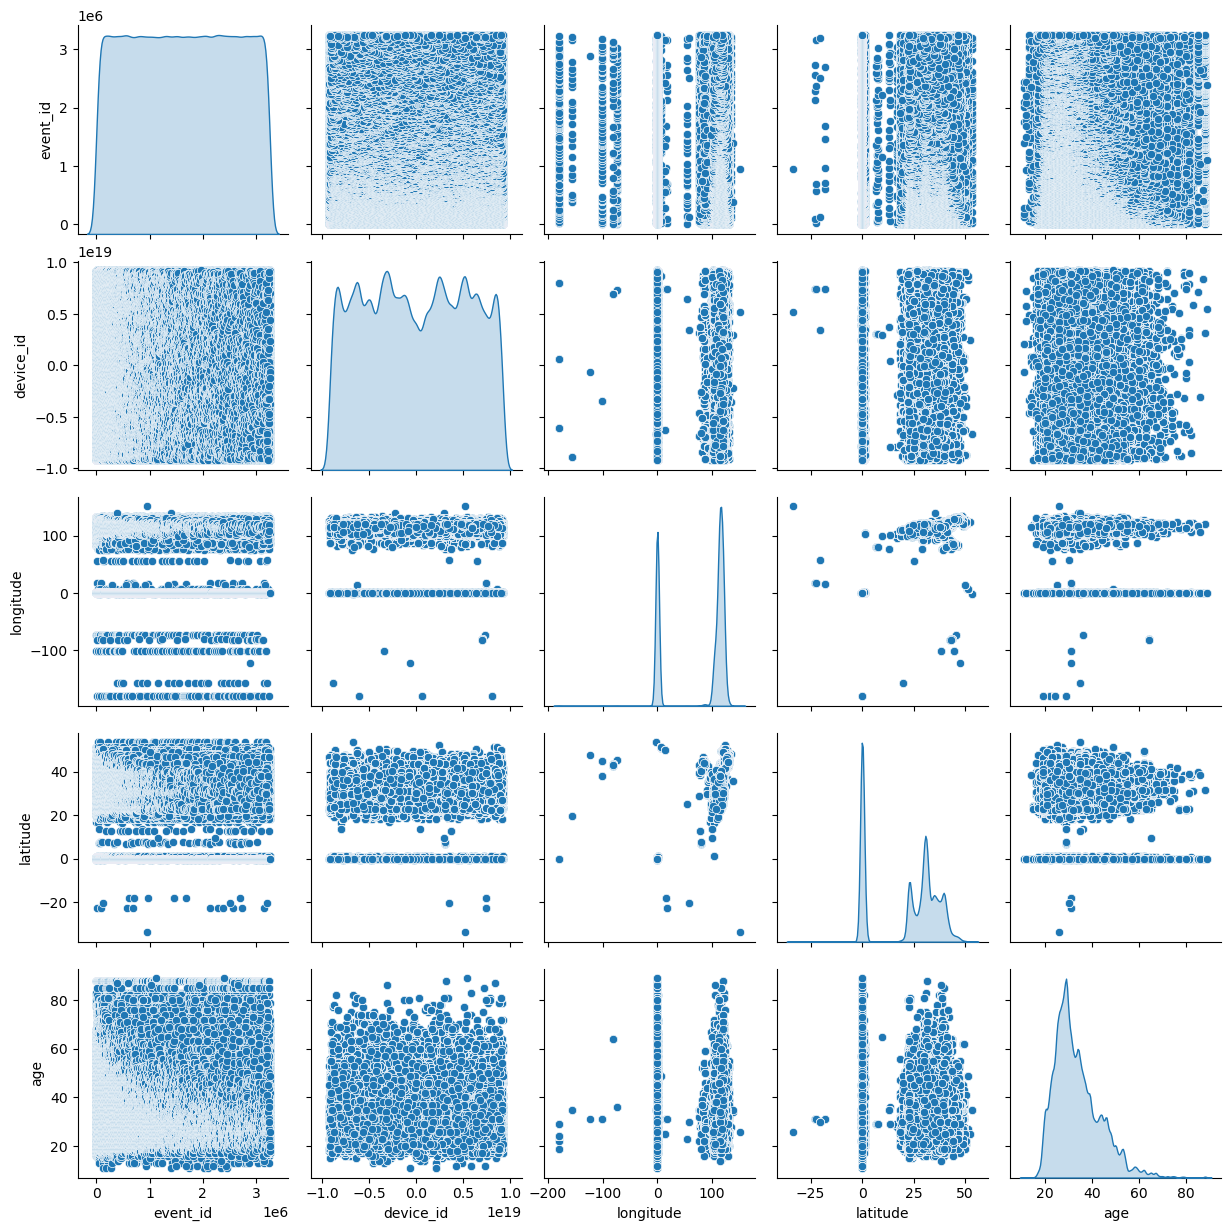

In [ ]:
sns.pairplot(dff, diag_kind = 'kde')

All feature seem fairly independent.
Data for age is right skewed.

Encode the categorical variables in the dataset.

In [ ]:
dff["gender"]=dff["gender"].astype('category')
dff["gender"] = dff["gender"].cat.codes
dff["phone_brand"]=dff["phone_brand"].astype('category')
dff["phone_brand"] = dff["phone_brand"].cat.codes
dff["device_model"]=dff["device_model"].astype('category')
dff["device_model"] = dff["device_model"].cat.codes
dff["group"]=dff["group"].astype('category')
dff["group"] = dff["group"].cat.codes


C:\Users\Shailvi\AppData\Local\Temp\ipykernel_17844\793573177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["gender"]=dff["gender"].astype('category')
C:\Users\Shailvi\AppData\Local\Temp\ipykernel_17844\793573177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["gender"] = dff["gender"].cat.codes
C:\Users\Shailvi\AppData\Local\Temp\ipykernel_17844\793573177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [ ]:
dff.head(10)

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,1,46,11,34,864
1,7104,29182687948017175,2016-05-02 09:37:02,121.38,31.24,1,46,11,34,864
2,29661,29182687948017175,2016-05-04 00:56:04,121.39,31.23,1,46,11,34,864
3,33133,29182687948017175,2016-05-06 05:01:15,121.38,31.24,1,46,11,34,864
4,38980,29182687948017175,2016-05-06 09:55:04,121.16,31.00,1,46,11,34,864
5,66398,29182687948017175,2016-05-01 01:56:06,121.38,31.24,1,46,11,34,864
6,70894,29182687948017175,2016-05-06 01:14:46,121.38,31.24,1,46,11,34,864
7,87185,29182687948017175,2016-05-01 09:20:01,121.38,31.24,1,46,11,34,864
8,94644,29182687948017175,2016-05-07 07:16:35,121.38,31.24,1,46,11,34,864
9,110018,29182687948017175,2016-05-06 21:00:40,121.38,31.24,1,46,11,34,864


Drop irrelevent columns.

In [ ]:
dff = dff.drop('event_id', axis=1)
dff = dff.drop('device_id', axis=1)
dff = dff.drop('timestamp', axis=1)
dff = dff.drop('age', axis=1)
dff = dff.drop('gender', axis=1) #we already have a group column we can find group through them.

In [ ]:
dff.head()

,longitude,latitude,group,phone_brand,device_model
0,121.38,31.24,11,34,864
1,121.38,31.24,11,34,864
2,121.39,31.23,11,34,864
3,121.38,31.24,11,34,864
4,121.16,31.00,11,34,864


Standardize the data, so that the values are within a particular range

In [ ]:

sc = StandardScaler()
dff_std =  sc.fit_transform(dff)
cov_matrix = np.cov(dff_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00000082  0.94948479  0.05379703 -0.08693885  0.08264407]
 [ 0.94948479  1.00000082  0.04619348 -0.08911776  0.0740776 ]
 [ 0.05379703  0.04619348  1.00000082  0.03336482  0.0273591 ]
 [-0.08693885 -0.08911776  0.03336482  1.00000082  0.12527599]
 [ 0.08264407  0.0740776   0.0273591   0.12527599  1.00000082]]


Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95%of the variance in data is explained by the same.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-7.07458391e-01  6.97800869e-01 -1.06634360e-01  3.45108110e-02
  -3.83264272e-03]
 [ 7.06706066e-01  6.97206967e-01 -1.12995215e-01  3.93046202e-02
  -1.24983947e-02]
 [ 5.50364159e-03  7.02208635e-02  1.05667289e-01 -9.48184176e-01
   2.91238617e-01]
 [ 5.39930739e-04 -1.10245793e-01 -7.09799751e-01  1.23061656e-01
   6.84752302e-01]
 [ 6.21127518e-03  9.94549520e-02  6.78881383e-01  2.88213024e-01
   6.67924736e-01]]

 Eigen Values 
%s [0.05044798 1.97960563 0.84796688 0.98348148 1.13850213]


In [ ]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(1.9796056347755213, array([ 0.69780087,  0.69720697,  0.07022086, -0.11024579,  0.09945495])), (1.1385021298652638, array([-0.00383264, -0.01249839,  0.29123862,  0.6847523 ,  0.66792474])), (0.9834814842723633, array([ 0.03451081,  0.03930462, -0.94818418,  0.12306166,  0.28821302])), (0.8479668804552607, array([-0.10663436, -0.11299521,  0.10566729, -0.70979975,  0.67888138])), (0.050447983775963046, array([-7.07458391e-01,  7.06706066e-01,  5.50364159e-03,  5.39930739e-04,
        6.21127518e-03]))]
Eigenvalues in descending order: 
[1.9796056347755213, 1.1385021298652638, 0.9834814842723633, 0.8479668804552607, 0.050447983775963046]


In [ ]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each
# eigen vector... there will be 6 entries as there are 6 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 6 entries with 6 th entry
# cumulative reaching almost 100%

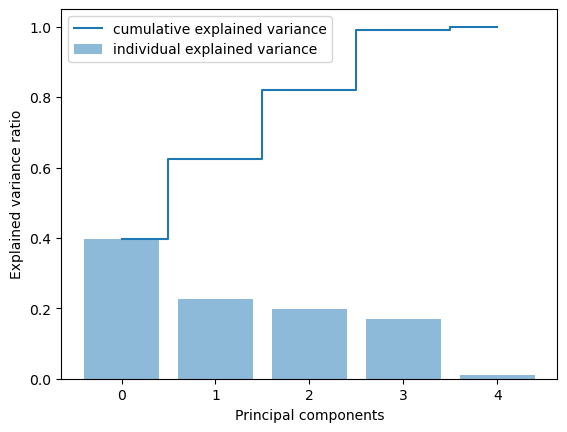

In [ ]:
plt.bar(range(5), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(5),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

First 4 components explains approximately 98% of the data so we can choose these as principal components.

In [ ]:
P_reduce = np.array(eigvectors_sorted[0:4])   # Reducing from 6 to 5 dimension space

dff_std_5D = np.dot(dff_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(dff_std_5D)  # converting array to dataframe

In [ ]:
Proj_data_df.head()

,0,1,2,3
0,1.124771,1.101628,-0.741720,0.437414
1,1.124771,1.101628,-0.741720,0.437414
2,1.124455,1.101635,-0.741739,0.437467
3,1.124771,1.101628,-0.741720,0.437414
4,1.111225,1.101835,-0.742464,0.439583


In [ ]:
dff_scaled = dff
ss = StandardScaler()
dff_scaled.iloc[:,:] = ss.fit_transform(dff_scaled.iloc[:,:])
dff_scaled.head()

,longitude,latitude,group,phone_brand,device_model
0,0.798830,0.601520,1.148623,0.228518,0.930054
1,0.798830,0.601520,1.148623,0.228518,0.930054
2,0.799016,0.600881,1.148623,0.228518,0.930054
3,0.798830,0.601520,1.148623,0.228518,0.930054
4,0.794742,0.586183,1.148623,0.228518,0.930054


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

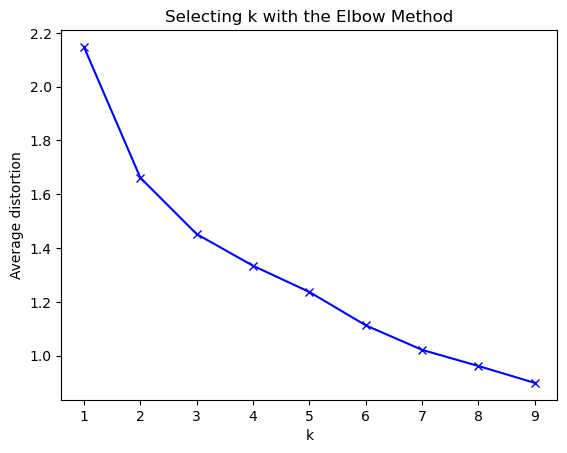

In [ ]:
from scipy.spatial.distance import cdist
clusters=range(1,10) #since the highest number of gaussian's visible was 18
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dff_scaled)
    prediction=model.predict(dff_scaled)
    meanDistortions.append(sum(np.min(cdist(dff, model.cluster_centers_, 'euclidean'), axis=1)) / dff_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

we will take k=3

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=15, random_state=2345)
kmeans.fit(dff_scaled)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [ ]:
## obtained labels from kmeans clustering
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [ ]:
## Creating a new dataframe only for labels and converting it into categorical variables.
dff_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))

dff_labels.head(5)

,Labels
0,1
1,1
2,1
3,1
4,1


In [ ]:
dff_labels['Labels'] = dff_labels['Labels'].astype('category')

In [ ]:
## joining the label dataframe with unscaled initial dataframe.(df)

dff_kmeans = dff.join(dff_labels)

dff_kmeans.head()

,longitude,latitude,group,phone_brand,device_model,Labels
0,0.798830,0.601520,1.148623,0.228518,0.930054,1
1,0.798830,0.601520,1.148623,0.228518,0.930054,1
2,0.799016,0.600881,1.148623,0.228518,0.930054,1
3,0.798830,0.601520,1.148623,0.228518,0.930054,1
4,0.794742,0.586183,1.148623,0.228518,0.930054,1


In [ ]:
dff_kmeans['Labels'].value_counts()

1    472136
2    384911
0    353717
Name: Labels, dtype: int64

C:\Users\Shailvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shailvi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


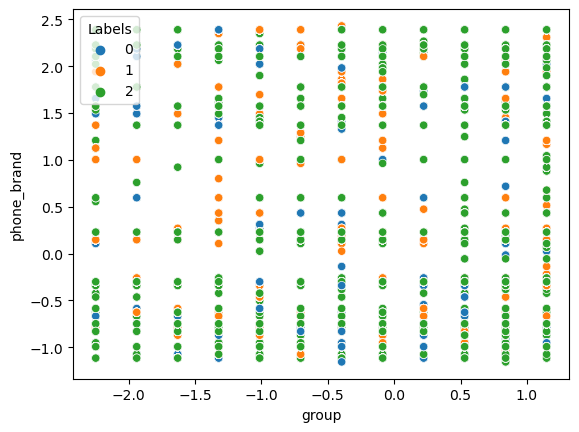

In [ ]:
sns.scatterplot(dff_kmeans['group'],dff_kmeans['phone_brand'],hue='Labels',data=dff_kmeans)
plt.show()

C:\Users\Shailvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shailvi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


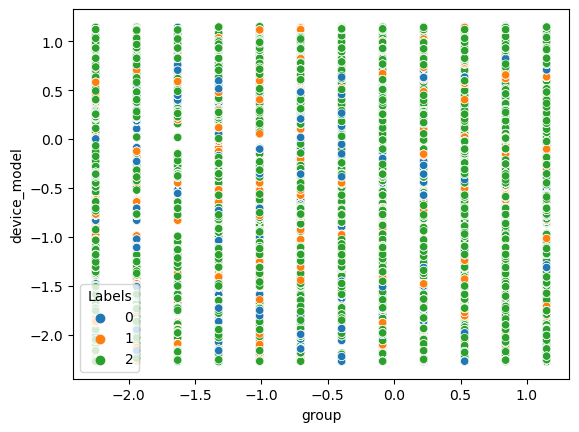

In [ ]:
sns.scatterplot(dff_kmeans['group'],dff_kmeans['device_model'],hue='Labels',data=dff_kmeans)
plt.show()

In [ ]:
dff_reduced = dff_scaled[0:10000] #for reducing computation time

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(dff_reduced)
    labels = kmeans.predict(dff_reduced)
    print(i,silhouette_score(dff_reduced,labels))

2 0.43133767552693797
3 0.490052285617458
4 0.4517050426043519
5 0.47590710790180446
6 0.5122327784083234
7 0.540731431806406
8 0.5590997380177198
9 0.5700875311449374
10 0.5885534539068205
11 0.6023419224764188
12 0.6322271312512113
13 0.6447445647773132
14 0.62662156922699


Silhouette score is higher for cluster 13 and 14

Agglomerative Clustering

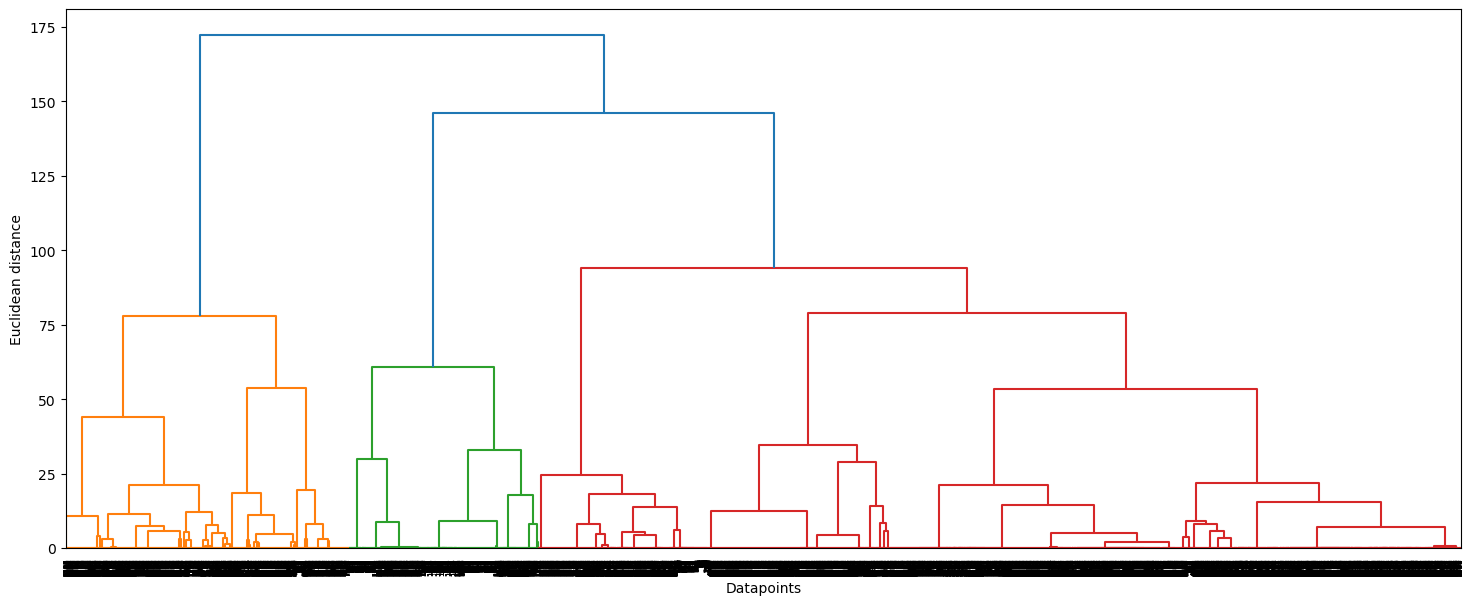

In [ ]:
plt.figure(figsize=[18,7])
merg = linkage(dff_reduced, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

We can observe that 3 number of cluster will be optimal from above dendogram.

In [ ]:
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')

hie_cluster_model = hie_cluster.fit(dff_reduced)

In [ ]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head()

,Labels
0,0
1,0
2,0
3,0
4,0


In [ ]:
df_hier = df.join(df_label1)
df_hier.head()


,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model,Labels
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,M,46,M39+,小米,红米note,0.0
1,7104,29182687948017175,2016-05-02 09:37:02,121.38,31.24,M,46,M39+,小米,红米note,0.0
2,29661,29182687948017175,2016-05-04 00:56:04,121.39,31.23,M,46,M39+,小米,红米note,0.0
3,33133,29182687948017175,2016-05-06 05:01:15,121.38,31.24,M,46,M39+,小米,红米note,0.0
4,38980,29182687948017175,2016-05-06 09:55:04,121.16,31.00,M,46,M39+,小米,红米note,0.0


In [ ]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(dff_reduced)
    labels = hier.fit_predict(dff_reduced)
    print(i,silhouette_score(dff_reduced,labels))

2 0.4305473531437471
3 0.490270514710751
4 0.44201966841652696
5 0.47553437162309437
6 0.5074853706478194
7 0.5365277246830399
8 0.5535713958245445
9 0.5631087344795659
10 0.5825123164494126
11 0.6100238251710817
12 0.6260544162107324
13 0.6416714752624779
14 0.6615818936385736


From above silhouette score for clusters 13 and 14 is high

Conclusion:
For k means clustering, 4 clusters were chosen, the silhhouette score for 3 cluster is 0.49.
For agglomerative clustering also we chose 3 clusters, the silhouette score for it is 0.46.
So we can choose either clustering for building our model.

C:\Users\Shailvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


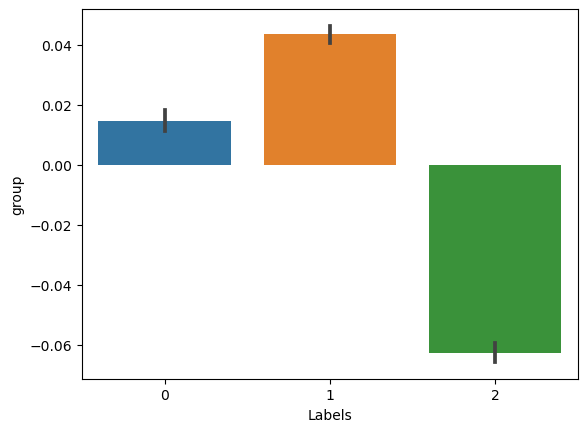

In [ ]:
sns.barplot(dff_kmeans['Labels'],dff_kmeans['group'])
plt.show()

Lower age group people are in cluster 2, middle age group people are in cluster 0 and older age group people are in cluster 1.